# Preprocessing Data

Pada tahap ini, kita akan melakukan preprocessing data dengan menghapus outlier yang telah teridentifikasi pada tahap Data Understanding. Kita akan menggunakan tiga metode deteksi outlier yang berbeda untuk memastikan data yang dibuang benar-benar merupakan outlier. Pendekatan ini menggunakan sistem voting dari ketiga metode untuk membuat keputusan yang lebih robust dalam menghapus outlier.

In [57]:
# Import library yang diperlukan untuk preprocessing
import pandas as pd
import numpy as np
from pyod.models.abod import ABOD
from pyod.models.knn import KNN
from pyod.models.cof import COF
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca dataset original
print("Membaca dataset awal...")
df = pd.read_csv('IRIS.csv')
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df[features].values

print("Informasi dataset sebelum preprocessing:")
print(f"Jumlah total data: {len(df)}")
print("\nStatistik deskriptif sebelum penghapusan outlier:")
print(df[features].describe())

Membaca dataset awal...
Informasi dataset sebelum preprocessing:
Jumlah total data: 150

Statistik deskriptif sebelum penghapusan outlier:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


## Metode Penghapusan Outlier

Untuk menghapus outlier, kita akan menggunakan tiga metode deteksi yang berbeda dan menerapkan sistem voting:

1. **ABOD (Angle-Based Outlier Detection)**
   - Menggunakan pendekatan sudut antar titik data
   - Efektif untuk dataset multidimensi
   - Cocok untuk Iris dataset yang memiliki 4 fitur

2. **KNN (K-Nearest Neighbors Outlier Detection)**
   - Menggunakan jarak ke tetangga terdekat
   - Sederhana dan intuitif
   - Baik untuk mendeteksi outlier lokal

3. **COF (Connectivity-Based Outlier Factor)**
   - Mempertimbangkan konektivitas antar data
   - Baik untuk dataset dengan cluster
   - Cocok untuk Iris dataset yang memiliki 3 kelas

Sistem Voting:
- Data akan dihapus jika diidentifikasi sebagai outlier oleh minimal 2 dari 3 metode
- Pendekatan ini mengurangi risiko false positive dalam penghapusan data

### Implementasi ABOD (Angle-Based Outlier Detection)

Menerapkan tiga metode deteksi outlier...

1. Deteksi dengan metode ABOD...


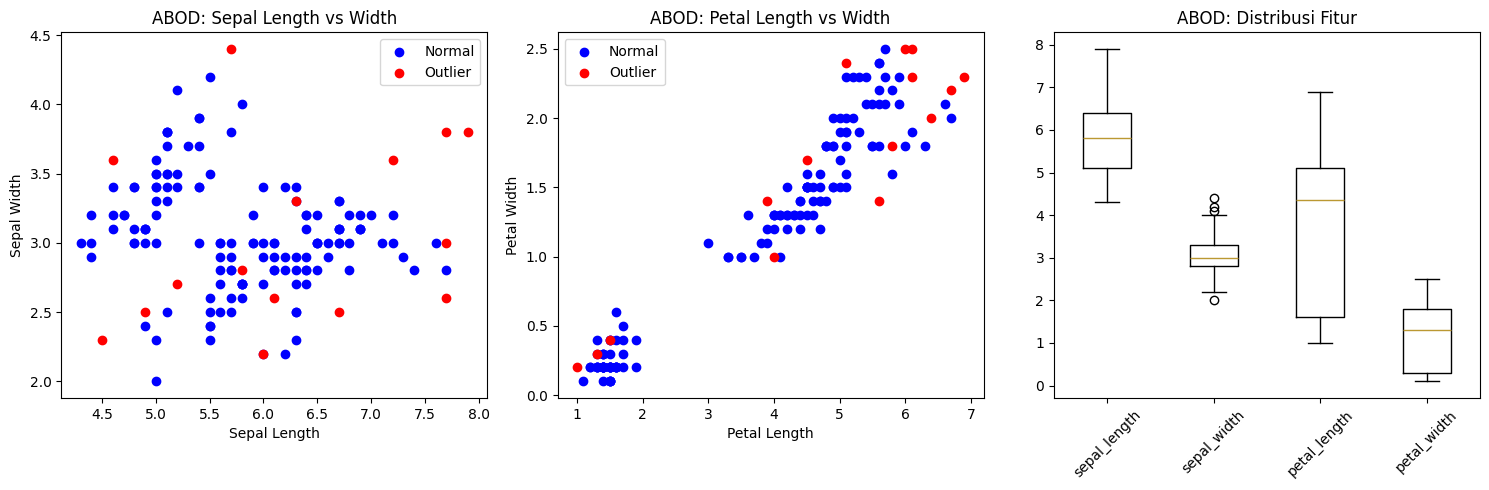


2. Deteksi dengan metode KNN...


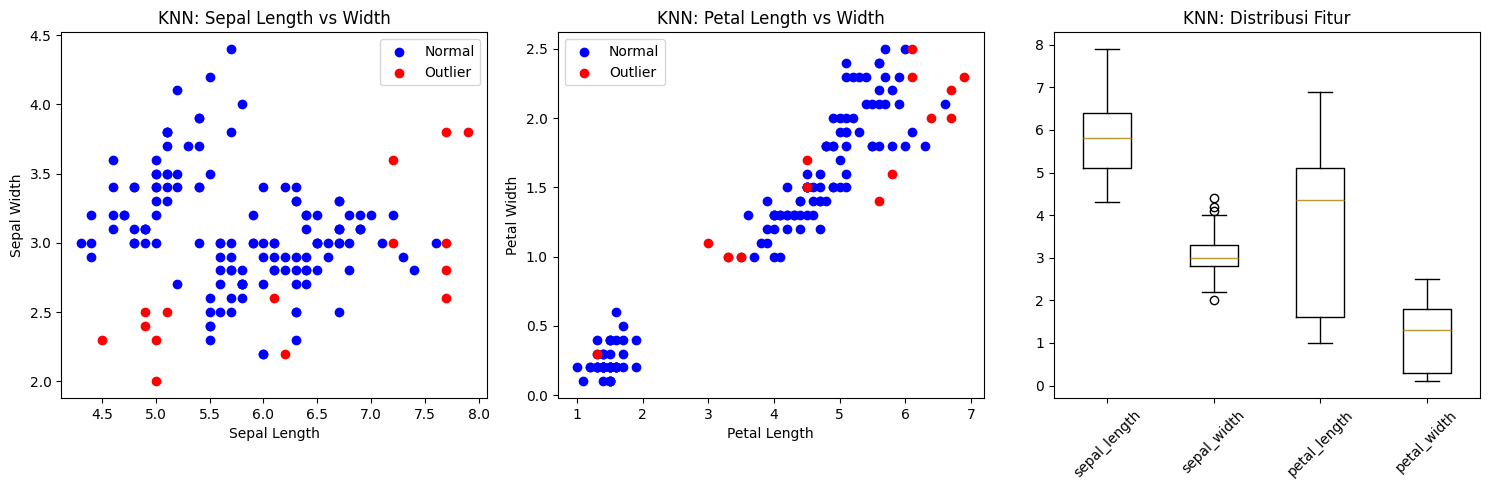


3. Deteksi dengan metode COF...


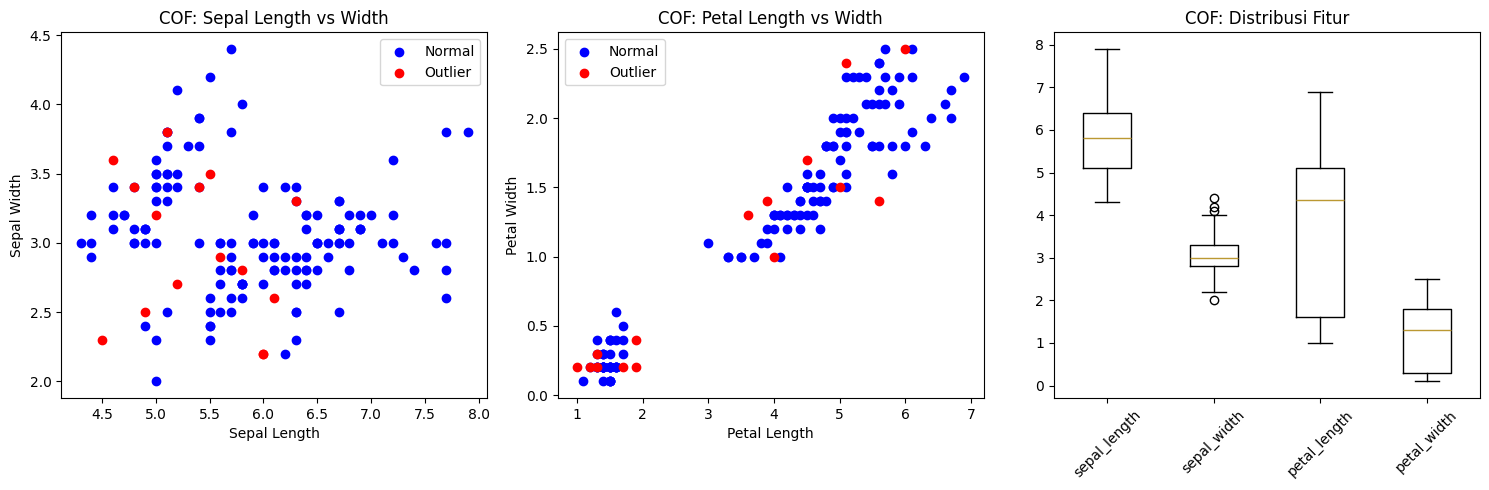


Ringkasan deteksi outlier per metode:
ABOD: 15 outlier terdeteksi
KNN: 15 outlier terdeteksi
COF: 15 outlier terdeteksi


In [58]:
# Deteksi outlier dengan tiga metode berbeda
print("Menerapkan tiga metode deteksi outlier...")

# 1. ABOD
print("\n1. Deteksi dengan metode ABOD...")
abod = ABOD(contamination=0.1)
df['ABOD_outlier'] = abod.fit_predict(X)

# Visualisasi hasil ABOD
plt.figure(figsize=(15, 5))
# Plot 1: Scatter plot sepal
plt.subplot(1, 3, 1)
plt.scatter(df[df['ABOD_outlier'] == 0]['sepal_length'], 
           df[df['ABOD_outlier'] == 0]['sepal_width'],
           c='blue', label='Normal')
plt.scatter(df[df['ABOD_outlier'] == 1]['sepal_length'], 
           df[df['ABOD_outlier'] == 1]['sepal_width'],
           c='red', label='Outlier')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('ABOD: Sepal Length vs Width')
plt.legend()

# Plot 2: Scatter plot petal
plt.subplot(1, 3, 2)
plt.scatter(df[df['ABOD_outlier'] == 0]['petal_length'], 
           df[df['ABOD_outlier'] == 0]['petal_width'],
           c='blue', label='Normal')
plt.scatter(df[df['ABOD_outlier'] == 1]['petal_length'], 
           df[df['ABOD_outlier'] == 1]['petal_width'],
           c='red', label='Outlier')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('ABOD: Petal Length vs Width')
plt.legend()

# Plot 3: Box plot untuk semua fitur
plt.subplot(1, 3, 3)
df_outliers = df[df['ABOD_outlier'] == 1]
plt.boxplot([df[feature] for feature in features], labels=features)
plt.title('ABOD: Distribusi Fitur')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. KNN
print("\n2. Deteksi dengan metode KNN...")
knn = KNN(contamination=0.1, n_neighbors=5)
df['KNN_outlier'] = knn.fit_predict(X)

# Visualisasi hasil KNN
plt.figure(figsize=(15, 5))
# Plot 1: Scatter plot sepal
plt.subplot(1, 3, 1)
plt.scatter(df[df['KNN_outlier'] == 0]['sepal_length'], 
           df[df['KNN_outlier'] == 0]['sepal_width'],
           c='blue', label='Normal')
plt.scatter(df[df['KNN_outlier'] == 1]['sepal_length'], 
           df[df['KNN_outlier'] == 1]['sepal_width'],
           c='red', label='Outlier')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('KNN: Sepal Length vs Width')
plt.legend()

# Plot 2: Scatter plot petal
plt.subplot(1, 3, 2)
plt.scatter(df[df['KNN_outlier'] == 0]['petal_length'], 
           df[df['KNN_outlier'] == 0]['petal_width'],
           c='blue', label='Normal')
plt.scatter(df[df['KNN_outlier'] == 1]['petal_length'], 
           df[df['KNN_outlier'] == 1]['petal_width'],
           c='red', label='Outlier')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('KNN: Petal Length vs Width')
plt.legend()

# Plot 3: Box plot untuk semua fitur
plt.subplot(1, 3, 3)
df_outliers = df[df['KNN_outlier'] == 1]
plt.boxplot([df[feature] for feature in features], labels=features)
plt.title('KNN: Distribusi Fitur')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. COF
print("\n3. Deteksi dengan metode COF...")
cof = COF(contamination=0.1, n_neighbors=5)
df['COF_outlier'] = cof.fit_predict(X)

# Visualisasi hasil COF
plt.figure(figsize=(15, 5))
# Plot 1: Scatter plot sepal
plt.subplot(1, 3, 1)
plt.scatter(df[df['COF_outlier'] == 0]['sepal_length'], 
           df[df['COF_outlier'] == 0]['sepal_width'],
           c='blue', label='Normal')
plt.scatter(df[df['COF_outlier'] == 1]['sepal_length'], 
           df[df['COF_outlier'] == 1]['sepal_width'],
           c='red', label='Outlier')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('COF: Sepal Length vs Width')
plt.legend()

# Plot 2: Scatter plot petal
plt.subplot(1, 3, 2)
plt.scatter(df[df['COF_outlier'] == 0]['petal_length'], 
           df[df['COF_outlier'] == 0]['petal_width'],
           c='blue', label='Normal')
plt.scatter(df[df['COF_outlier'] == 1]['petal_length'], 
           df[df['COF_outlier'] == 1]['petal_width'],
           c='red', label='Outlier')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('COF: Petal Length vs Width')
plt.legend()

# Plot 3: Box plot untuk semua fitur
plt.subplot(1, 3, 3)
df_outliers = df[df['COF_outlier'] == 1]
plt.boxplot([df[feature] for feature in features], labels=features)
plt.title('COF: Distribusi Fitur')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Menghitung total suara outlier untuk setiap data point
df['total_outlier_votes'] = df['ABOD_outlier'] + df['KNN_outlier'] + df['COF_outlier']

# Ringkasan deteksi outlier
print("\nRingkasan deteksi outlier per metode:")
print(f"ABOD: {sum(df['ABOD_outlier'])} outlier terdeteksi")
print(f"KNN: {sum(df['KNN_outlier'])} outlier terdeteksi")
print(f"COF: {sum(df['COF_outlier'])} outlier terdeteksi")

### Implementasi KNN Outlier Detection

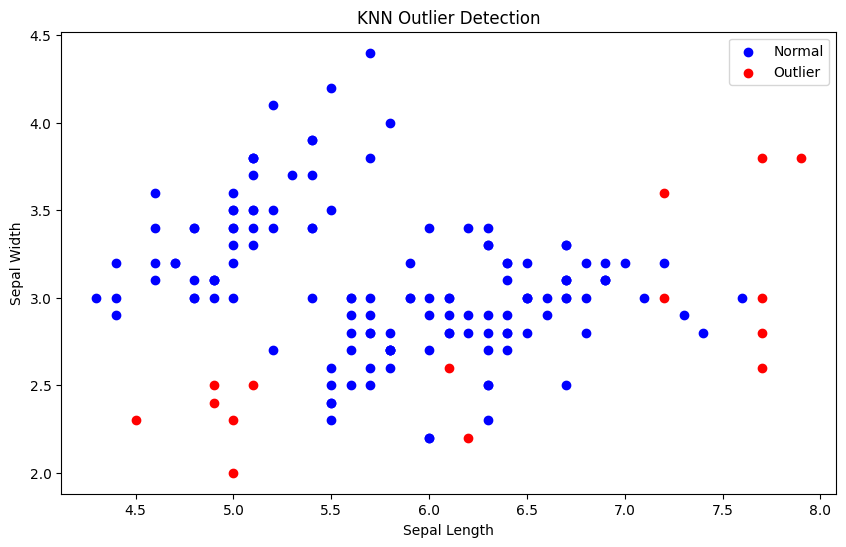

Jumlah outlier yang terdeteksi oleh KNN: 15


In [59]:
# Implementasi KNN Outlier Detection
knn = KNN(contamination=0.1, n_neighbors=5)
knn_scores = knn.fit_predict(X)

# Menambahkan hasil deteksi ke dataframe
df['KNN_outlier'] = knn_scores

# Visualisasi hasil KNN untuk dua fitur
plt.figure(figsize=(10, 6))
plt.scatter(df[df['KNN_outlier'] == 0]['sepal_length'], 
           df[df['KNN_outlier'] == 0]['sepal_width'],
           c='blue', label='Normal')
plt.scatter(df[df['KNN_outlier'] == 1]['sepal_length'], 
           df[df['KNN_outlier'] == 1]['sepal_width'],
           c='red', label='Outlier')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('KNN Outlier Detection')
plt.legend()
plt.show()

# Menampilkan jumlah outlier yang terdeteksi
print(f"Jumlah outlier yang terdeteksi oleh KNN: {sum(knn_scores)}")

### Implementasi COF (Connectivity-Based Outlier Factor)

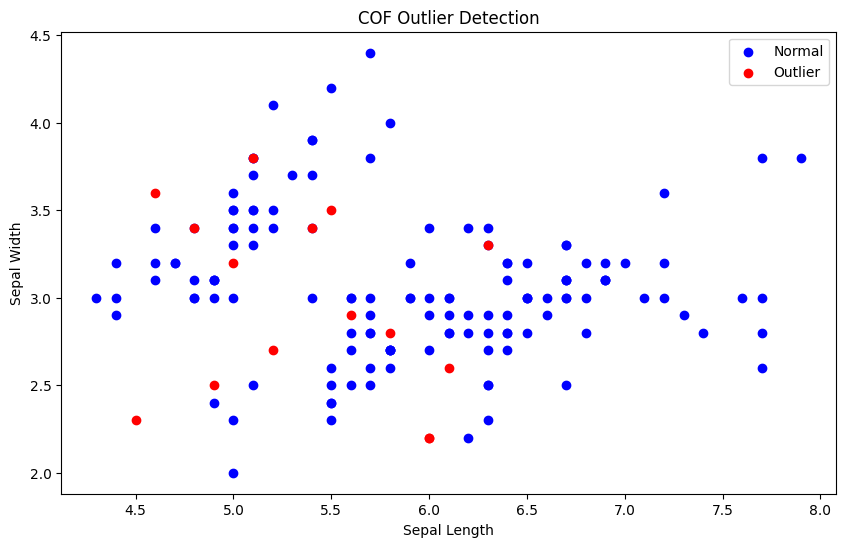

Jumlah outlier yang terdeteksi oleh COF: 15


In [60]:
# Implementasi COF
cof = COF(contamination=0.1, n_neighbors=5)
cof_scores = cof.fit_predict(X)

# Menambahkan hasil deteksi ke dataframe
df['COF_outlier'] = cof_scores

# Visualisasi hasil COF untuk dua fitur
plt.figure(figsize=(10, 6))
plt.scatter(df[df['COF_outlier'] == 0]['sepal_length'], 
           df[df['COF_outlier'] == 0]['sepal_width'],
           c='blue', label='Normal')
plt.scatter(df[df['COF_outlier'] == 1]['sepal_length'], 
           df[df['COF_outlier'] == 1]['sepal_width'],
           c='red', label='Outlier')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('COF Outlier Detection')
plt.legend()
plt.show()

# Menampilkan jumlah outlier yang terdeteksi
print(f"Jumlah outlier yang terdeteksi oleh COF: {sum(cof_scores)}")

## Penghapusan Outlier dan Hasil Preprocessing

Setelah mendeteksi outlier dengan tiga metode berbeda, kita akan menghapus data yang diidentifikasi sebagai outlier oleh minimal dua metode. Pendekatan ini memastikan bahwa kita hanya menghapus data yang benar-benar merupakan outlier.

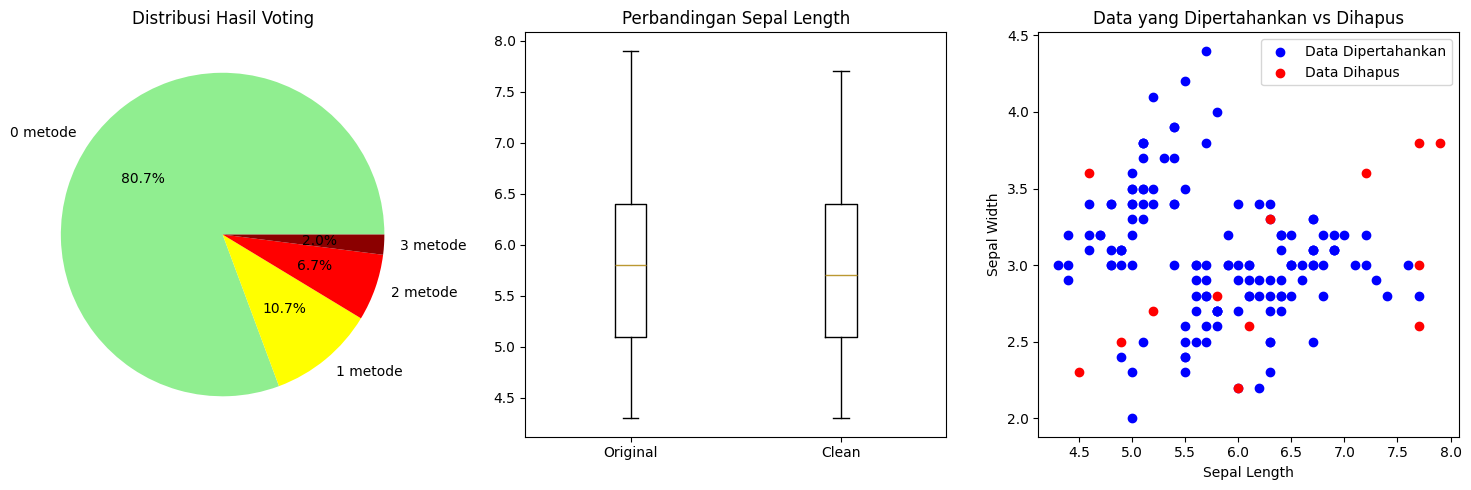

Hasil Preprocessing Data:
Total data awal: 150
Data yang dihapus: 13
Total data setelah preprocessing: 137

Perbandingan statistik deskriptif:

Sebelum penghapusan outlier:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Setelah penghapusan outlier:
       sepal_length  sepal_width  petal_length  petal_width
count    137.000000   137.000000    137.000000   137.000000
mean       5.802190     3.060584      3.651095     1.150365
std        0.769689     0.420322      1.717818     0.744502
min        4.3000

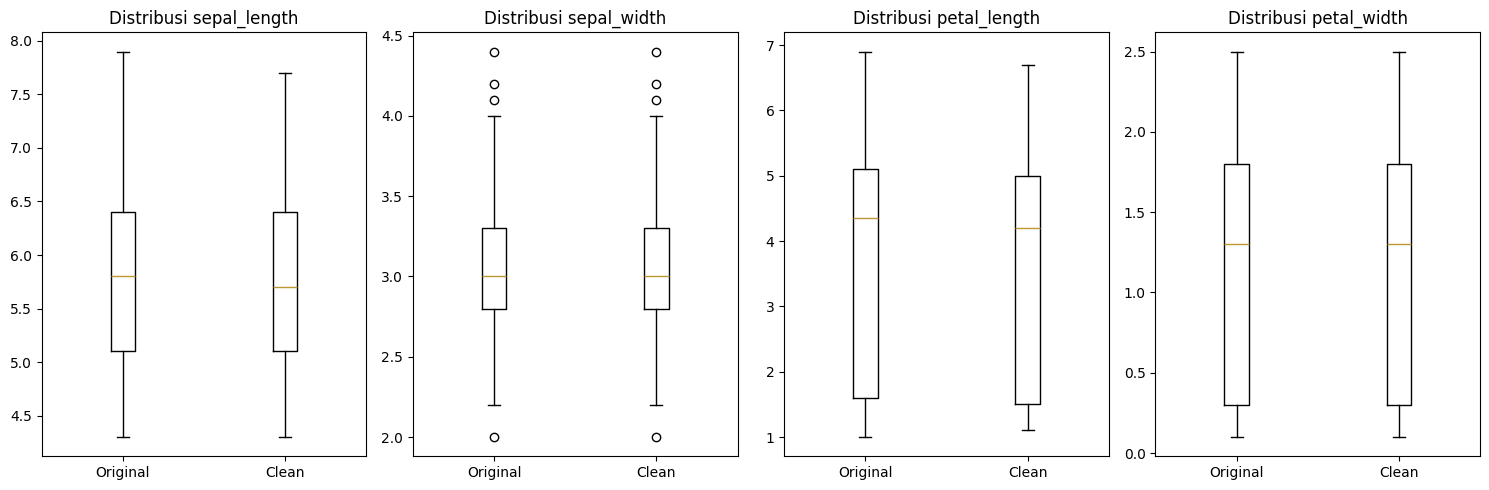


Dataset hasil preprocessing telah disimpan sebagai 'IRIS_clean.csv'


In [61]:
# Menghapus outlier berdasarkan sistem voting
df_clean = df[df['total_outlier_votes'] < 2].copy()

# Visualisasi hasil voting
plt.figure(figsize=(15, 5))
# Plot 1: Pie chart hasil voting
plt.subplot(1, 3, 1)
votes_count = df['total_outlier_votes'].value_counts().sort_index()
plt.pie(votes_count, labels=[f'{i} metode' for i in votes_count.index], 
        autopct='%1.1f%%', colors=['lightgreen', 'yellow', 'red', 'darkred'])
plt.title('Distribusi Hasil Voting')

# Plot 2: Perbandingan box plot sebelum dan sesudah
plt.subplot(1, 3, 2)
plt.boxplot([df[features[0]], df_clean[features[0]]], labels=['Original', 'Clean'])
plt.title('Perbandingan Sepal Length')

# Plot 3: Scatter plot data yang dipertahankan vs dihapus
plt.subplot(1, 3, 3)
plt.scatter(df[df['total_outlier_votes'] < 2]['sepal_length'],
           df[df['total_outlier_votes'] < 2]['sepal_width'],
           c='blue', label='Data Dipertahankan')
plt.scatter(df[df['total_outlier_votes'] >= 2]['sepal_length'],
           df[df['total_outlier_votes'] >= 2]['sepal_width'],
           c='red', label='Data Dihapus')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Data yang Dipertahankan vs Dihapus')
plt.legend()
plt.tight_layout()
plt.show()

# Statistik hasil preprocessing
print("Hasil Preprocessing Data:")
print(f"Total data awal: {len(df)}")
print(f"Data yang dihapus: {len(df) - len(df_clean)}")
print(f"Total data setelah preprocessing: {len(df_clean)}")

print("\nPerbandingan statistik deskriptif:")
print("\nSebelum penghapusan outlier:")
print(df[features].describe())
print("\nSetelah penghapusan outlier:")
print(df_clean[features].describe())

# Visualisasi perbandingan distribusi sebelum dan sesudah preprocessing
plt.figure(figsize=(15, 5))
for i, feature in enumerate(features, 1):
    plt.subplot(1, 4, i)
    plt.boxplot([df[feature], df_clean[feature]], labels=['Original', 'Clean'])
    plt.title(f'Distribusi {feature}')
plt.tight_layout()
plt.show()

# Menyimpan dataset yang telah dibersihkan
df_clean[features + ['species']].to_csv('IRIS_clean.csv', index=False)
print("\nDataset hasil preprocessing telah disimpan sebagai 'IRIS_clean.csv'")